<a href="https://colab.research.google.com/github/gp1313/Basics/blob/master/Exercise_8_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [6]:

!ls

sample_data  sign_mnist_test.csv  sign_mnist_train.csv


In [4]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv


In [25]:
with open('sign_mnist_test.csv') as f:
  label_list = []
  image_list = []
  for row_str in f.readlines()[1:4]:
    row = row_str.split(',')
    label_list.append(row[0])
    image_list.append(row[1:785])
  label_arr = np.array(label_list, dtype=float)
  image_arr = np.array(image_list, dtype=float)
  image_arr = image_arr.reshape((-1, 28, 28))
  print(label_arr, image_arr.shape)

[ 6.  5. 10.] (3, 28, 28)


In [40]:
def get_data(filename):
    # You will need to write code that will read the file passed
    # into this function. The first line contains the column headers
    # so you should ignore it
    # Each successive line contians 785 comma separated values between 0 and 255
    # The first value is the label
    # The rest are the pixel values for that picture
    # The function will return 2 np.array types. One with all the labels
    # One with all the images
    #
    # Tips: 
    # If you read a full line (as 'row') then row[0] has the label
    # and row[1:785] has the 784 pixel values
    # Take a look at np.array_split to turn the 784 pixels into 28x28
    # You are reading in strings, but need the values to be floats
    # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        label_list = []
        image_list = []
        for row_str in training_file.readlines()[1:]:
          row = row_str.split(',')
          label_list.append(row[0])
          image_list.append(row[1:785])
        labels = np.array(label_list, dtype=float)
        image_arr = np.array(image_list, dtype=float)
        images = image_arr.reshape((-1, 28, 28))
          # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [41]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                  )

validation_datagen = ImageDataGenerator(rescale=1./255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [0]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

In [54]:
# Compile Model. 
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=100), 
                              epochs=10,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=100))

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Epoch 1/10
275/275 [==============================] - 23s 84ms/step - loss: 2.4271 - acc: 0.2862 - val_loss: 2.0210 - val_acc: 0.4198
Epoch 2/10
275/275 [==============================] - 22s 81ms/step - loss: 2.3608 - acc: 0.2999 - val_loss: 1.8718 - val_acc: 0.4819
Epoch 3/10
275/275 [==============================] - 22s 81ms/step - loss: 2.2989 - acc: 0.3209 - val_loss: 1.8735 - val_acc: 0.4532
Epoch 4/10
275/275 [==============================] - 22s 81ms/step - loss: 2.2411 - acc: 0.3298 - val_loss: 1.6922 - val_acc: 0.5449
Epoch 5/10
275/275 [==============================] - 23s 82ms/step - loss: 2.1872 - acc: 0.3411 - val_loss: 1.6667 - val_acc: 0.5347
Epoch 6/10
275/275 [==============================] - 22s 81ms/step - loss: 2.1354 - acc: 0.3571 - val_loss: 1.6585 - val_acc: 0.4958
Epoch 7/10
275/275 [==============================] - 22s 81ms/step - loss: 2.0861 - acc: 0.3671 - val_loss: 1.5489 - val_acc: 0.5519
Epoch 8/10
275/275 [==============================] - 22s 81ms

[6.92426086682151, 0.56609035]

In [55]:
history.history

{'acc': [0.28621382,
  0.29987252,
  0.32092515,
  0.32984886,
  0.3411036,
  0.357057,
  0.3670734,
  0.3758514,
  0.38648698,
  0.40426153],
 'loss': [2.42674264202698,
  2.3608711214800215,
  2.2992487851658536,
  2.2410170034162986,
  2.187137662420028,
  2.135311157493682,
  2.086079268914888,
  2.0470721684959368,
  1.9979327259939066,
  1.9575579881103633],
 'val_acc': [0.4198271,
  0.48187396,
  0.45315114,
  0.54489684,
  0.53471833,
  0.49581707,
  0.5518684,
  0.5040435,
  0.562744,
  0.58853877],
 'val_loss': [2.020950567391184,
  1.871756214234564,
  1.8734927111201816,
  1.69219062394566,
  1.6666526512967215,
  1.6585467523998685,
  1.5488597402969997,
  1.561971793572108,
  1.4815297722816467,
  1.4027640653981104]}

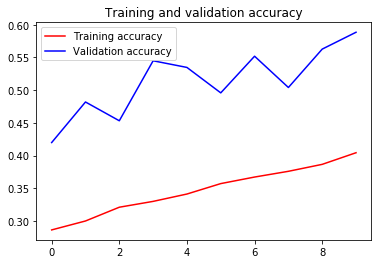

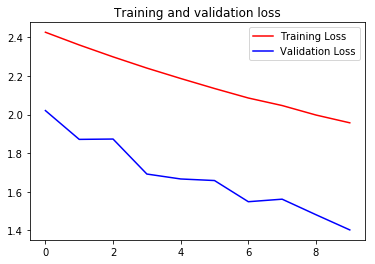

In [56]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()